In [46]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf  # for data
from pandas_datareader import data as pdr
import altair as alt
yf.pdr_override()

In [47]:
def read_data(stock='QQQ'):


    df = pdr.get_data_yahoo(stock,period = "90d",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "1d",) 
    return df

In [48]:
df = read_data(stock='AAPL')

[*********************100%***********************]  1 of 1 completed


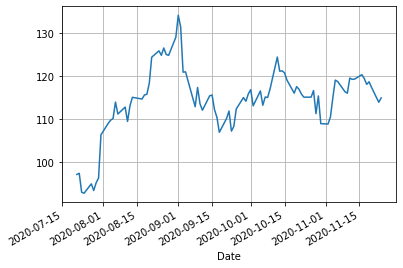

In [49]:
df['Close'].plot(grid = True);

In [5]:
# returns : 
daily_close = df[['Adj Close']]

In [6]:
daily_pct_change = (daily_close/daily_close.shift(1))-1

In [7]:
daily_pct_change.head(5)

,Adj Close
Date,
2020-07-16,NaN
2020-07-17,-0.002020
2020-07-20,0.021074
2020-07-21,-0.013802
2020-07-22,0.002809


In [8]:
len(daily_pct_change)

90

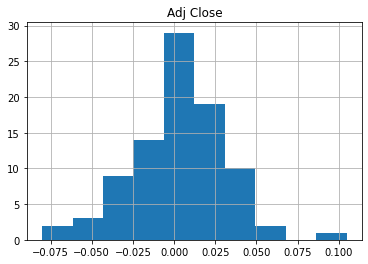

In [9]:
# looking at the histrgram
daily_pct_change.hist();


In [10]:
# inspect the daily statisics
daily_pct_change.describe()

,Adj Close
count,89.000000
mean,0.002702
std,0.028075
min,-0.080061
25%,-0.011954
50%,0.000743
75%,0.017698
max,0.104689


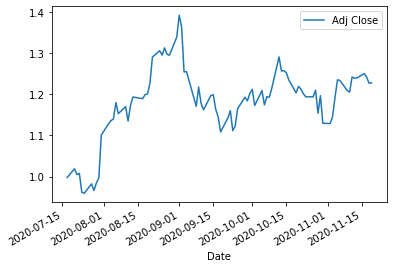

In [11]:
# plotting
cum_daily_return = (1+daily_pct_change).cumprod()
cum_daily_return.plot();

In [12]:
# how about monthly return
cum_daily_return.resample("M").mean()

,Adj Close
Date,
2020-07-31,0.998326
2020-08-31,1.217056
2020-09-30,1.194880
2020-10-31,1.208248
2020-11-30,1.215845


In [13]:
# changing the interval change the shape of the plot completely

### Multiple stocks

In [14]:
def read_multiple_data(stocks=['TSLA','LYFT']):
    
    """
    join data for multiple stocks with two keys, one for ticker and one for date
    
    """
    
    joind_data = map(read_data,stocks)

    return pd.concat(joind_data,keys = stocks, names = ['Ticker','Date'])

In [15]:
df = read_multiple_data(stocks=['ZM','AAPL','TSLA'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
df

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
ZM     2020-07-16  250.389999  253.000000  243.429993  248.539993  248.539993   
       2020-07-17  247.169998  250.936996  241.289993  246.539993  246.539993   
       2020-07-20  246.487000  271.350006  245.990005  268.579987  268.579987   
       2020-07-21  268.750000  269.750000  258.200012  260.440002  260.440002   
       2020-07-22  261.950012  265.399994  255.809998  261.179993  261.179993   
...                       ...         ...         ...         ...         ...   
TSLA   2020-11-13  410.850006  412.529999  401.660004  408.500000  408.500000   
       2020-11-16  408.929993  412.450012  404.089996  408.089996  408.089996   
       2020-11-17  460.170013  462.000000  433.010010  441.609985  441.609985   
       2020-11-18  448.350006  496.000000  443.500000  486.640015  486.640015   
       2020-11-19  492.000000  508.611206  487.600006  503.569397  503.569397   

                     Volume  
Ticker Date                  
ZM     2020-07-16   5420100  
       2020-07-17   4626600  
       2020-07-20   9784900  
       2020-07-21   4762000  
       2020-07-22   4581600  
...                     ...  
TSLA   2020-11-13  19771100  
       2020-11-16  26838600  
       2020-11-17  61188300  
       2020-11-18  77698800  
       2020-11-19  48719833  

[270 rows x 6 columns]

In [17]:
df['daily_pct_change'] = (df['Adj Close']/df['Adj Close'].shift(1))-1

In [18]:
df = df.reset_index()

In [19]:
df['cum_daily_return'] = (1+df['daily_pct_change']).cumprod()

In [20]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,daily_pct_change,cum_daily_return
0,ZM,2020-07-16,250.389999,253.000000,243.429993,248.539993,248.539993,5420100,NaN,NaN
1,ZM,2020-07-17,247.169998,250.936996,241.289993,246.539993,246.539993,4626600,-0.008047,0.991953
2,ZM,2020-07-20,246.487000,271.350006,245.990005,268.579987,268.579987,9784900,0.089397,1.080631
3,ZM,2020-07-21,268.750000,269.750000,258.200012,260.440002,260.440002,4762000,-0.030307,1.047880
4,ZM,2020-07-22,261.950012,265.399994,255.809998,261.179993,261.179993,4581600,0.002841,1.050857
...,...,...,...,...,...,...,...,...,...,...
265,TSLA,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,-0.007917,1.643599
266,TSLA,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,-0.001004,1.641949
267,TSLA,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300,0.082139,1.776817
268,TSLA,2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,77698800,0.101968,1.957995


In [21]:
# plotting daily return

alt.Chart(df,title = 'Daily return').mark_line(interpolate='basis', ).encode(
    x='Date:T',
    y='daily_pct_change:Q',
    color='Ticker:N'
)



alt.Chart(...)

In [22]:
alt.Chart(df,title = 'Cumlative return').mark_line(interpolate='basis').encode(
    x='Date:T',
    y='cum_daily_return:Q',
    color='Ticker:N'
)



alt.Chart(...)

In [23]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,daily_pct_change,cum_daily_return
0,ZM,2020-07-16,250.389999,253.000000,243.429993,248.539993,248.539993,5420100,NaN,NaN
1,ZM,2020-07-17,247.169998,250.936996,241.289993,246.539993,246.539993,4626600,-0.008047,0.991953
2,ZM,2020-07-20,246.487000,271.350006,245.990005,268.579987,268.579987,9784900,0.089397,1.080631
3,ZM,2020-07-21,268.750000,269.750000,258.200012,260.440002,260.440002,4762000,-0.030307,1.047880
4,ZM,2020-07-22,261.950012,265.399994,255.809998,261.179993,261.179993,4581600,0.002841,1.050857
...,...,...,...,...,...,...,...,...,...,...
265,TSLA,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,-0.007917,1.643599
266,TSLA,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,-0.001004,1.641949
267,TSLA,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300,0.082139,1.776817
268,TSLA,2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,77698800,0.101968,1.957995


In [24]:
daily_close_px =df[['Date', 'Ticker', 'Adj Close']]

In [25]:
daily_close_px = daily_close_px.fillna(0)

In [26]:
min_periods = 26

# Calculate the volatility
daily_close_px['vol'] = daily_close_px['Adj Close'].rolling(min_periods).std() * np.sqrt(min_periods) 



In [27]:
alt.Chart(daily_close_px,title = 'Volatility').mark_line(interpolate='basis').encode(
    x='Date:T',
    y='vol:Q',
    color='Ticker:N'
)



alt.Chart(...)

In [28]:
df1 = df[df['Ticker'].isin(['ZM','TSLA'])][['Date','Ticker','daily_pct_change']]

#plt.scatter(df_zm,df_tsla)

In [29]:
df1

,Date,Ticker,daily_pct_change
0,2020-07-16,ZM,NaN
1,2020-07-17,ZM,-0.008047
2,2020-07-20,ZM,0.089397
3,2020-07-21,ZM,-0.030307
4,2020-07-22,ZM,0.002841
...,...,...,...
265,2020-11-13,TSLA,-0.007917
266,2020-11-16,TSLA,-0.001004
267,2020-11-17,TSLA,0.082139
268,2020-11-18,TSLA,0.101968


In [30]:
df12 = df1.pivot(index='Date', columns='Ticker', values='daily_pct_change').dropna()

    
df12             

Ticker,TSLA,ZM
Date,,
2020-07-17,0.000133,-0.008047
2020-07-20,0.094720,0.089397
2020-07-21,-0.045429,-0.030307
2020-07-22,0.015284,0.002841
2020-07-23,-0.049776,-0.037063
...,...,...
2020-11-13,-0.007917,-0.058464
2020-11-16,-0.001004,-0.010977
2020-11-17,0.082139,0.006213


In [31]:
alt.Chart(df12,title = 'Stocks inter-relationship').mark_point(interpolate='basis').encode(
    x='TSLA:Q',
    y='ZM:Q',
)




alt.Chart(...)

In [32]:
### building linear model

In [33]:
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import train_test_split

In [34]:
X = df12[['TSLA']].values
y = df12[['ZM']].values

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 11)
print(len(X_train))
print(len(y_train))

80
80


In [35]:
lr = LinearRegression().fit(X_train,y_train)

In [36]:
lr.score(X_test,y_test)

-0.7306082999161636

In [37]:
## Back Testing

In [51]:
def read_data(stock='AAPL',short = 26,long = 60):


    df = pdr.get_data_yahoo(stock,period = "60d",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "2m",)


    emasUsed = [short,long]
    for ema in emasUsed:
        df['Ema_' + str(ema)] = round(df['Adj Close'].ewm(span = ema, adjust = False).mean(),2)
    df['Middle Band'] =df['Adj Close'].rolling(window=20).mean()
    df['Upper Band'] = df['Middle Band'] + 1.96*df['Close'].rolling(window=20).std()
    df['Lower Band'] = df['Middle Band'] - 1.96*df['Close'].rolling(window=20).std()
    df['status_lower'] = np.where(df['Close'] < df['Lower Band'],'below_ballinger','normal')
    df['status_upper'] = np.where(df['Close'] > df['Upper Band'],'above_ballinger','normal')
    df['daily_pct_change'] = (df['Adj Close']/df['Adj Close'].shift(1))-1
    
    return df

In [52]:
def print_results(percentchange,stock = 'TSLA'):
    gains = 0
    ng = 0
    losses = 0
    nl = 0
    totallR = 1
    for i in percentchange:
        if i >0:
            gains +=i
            ng +=1
        else:
            losses +=i
            nl +=1
        totallR = totallR*((i/100)+1)
    totallR = round((totallR-1)*100)
    if ng > 0:
        avgGain = gains/ng
        maxR = str(max(percentchange))
    else:
        avgGain = 0
        maxR = 'undefined'

    if nl>0:
        avgLoss = losses/nl
        maxL = str(min(percentchange))
        ratio = str(-(avgGain/avgLoss))
    else:
        avgLoss = 0
        maxL = 'undefined'
        ratio = 'inf'

    if ng >0 and nl >0:
        bettingAvg = ng/(ng+nl)
    else:
        bettingAvg = 0


    print()
    print('Result for '+stock+" going back to "+str(df.index[0])+" Sample size: "+str(ng+nl)+"trades")
    #print('EMAs used : ',str(emasUsed))
    print('Batting Avg : '+str(bettingAvg))
    print('Gain/loss ratio: ' + ratio)
    print('Avg gain: ' + str(avgGain))
    print('Avg loss: '+ str(avgLoss))
    print('Max return: '+ str(maxR))
    print('Max loss: ' + str(maxL))
    print('Total return over '+str(ng+nl)+' trades: '+str(totallR)+'%')
    print()




In [53]:
stock = input('Enter stock tikcer symbol:')

short = int(input('Enter short moving avg'))
long = int(input('Enter long term movin avg'))
df = read_data(stock, short,long)




short_moving_avg = 'Ema_'+ str(short)
long_moving_avg = 'Ema_'+ str(long)

Enter stock tikcer symbol: AAPL
Enter short moving avg 26
Enter long term movin avg 50


[*********************100%***********************]  1 of 1 completed


In [54]:
pos = 0
num = 0
percentchange = []
start_of_this_month = int((len(df.index[:])/60)*30)

for i in df.index[start_of_this_month:]:

    cmin = df[short_moving_avg][i]
    cmax = df[long_moving_avg][i]
    close = df['Adj Close'][i]

    #if(status_lower=='below_ballinger'):
   # if (cmin>cmax) and (status_lower=='below_ballinger'):
    if (cmin>cmax) :
       # print('red white blue')
        if pos ==0:
            bp =close
            pos=1
            print('Buying now at '+ str(bp))
            #print(i)


    elif(cmin<cmax):
        #print('blue white red')
        if pos ==1:
            pos = 0
            sp = close
            print('Selling now at '+ str(sp))
            #print(i)
            pc = (sp/bp-1)*100
            percentchange.append(pc)

    if num ==df['Adj Close'].count()-1 and pos==1:
        pos = 0
        sp = close
        print('Selling now at'+ str(sp))
        pc = (sp/bp-1)*100
        percentchange.append(pc)      
    num +=1
print_results(percentchange, stock = stock )

Buying now at 108.16500091552734
Selling now at 110.61000061035156
Buying now at 110.8550033569336
Selling now at 114.80500030517578
Buying now at 115.33499908447266
Selling now at 114.70500183105469
Buying now at 115.0999984741211
Selling now at 117.58999633789062
Buying now at 118.1449966430664
Selling now at 117.5790023803711
Buying now at 117.83499908447266
Selling now at 118.44499969482422
Buying now at 118.8572998046875
Selling now at 120.18000030517578
Buying now at 120.86990356445312
Selling now at 120.27300262451172
Buying now at 117.0999984741211
Selling now at 116.02999877929688
Buying now at 117.0
Selling now at 116.13999938964844
Buying now at 117.13899993896484
Selling now at 116.25499725341797
Buying now at 116.93499755859375
Selling now at 116.47000122070312
Buying now at 117.29000091552734
Selling now at 118.86990356445312
Buying now at 119.29000091552734
Selling now at 119.36000061035156
Buying now at 119.97000122070312
Selling now at 119.44999694824219
Buying now at 

In [51]:
pos = 0
num = 0
percentchange = []
start_of_this_month = int((len(df.index[:])/60)*30)

for i in df.index[start_of_this_month:]:

    cmin = df[short_moving_avg][i]
    cmax = df[long_moving_avg][i]
    close = df['Adj Close'][i]
    #if(status_lower=='below_ballinger'):
   # if (cmin>cmax) and (status_lower=='below_ballinger'):
    if (cmin>cmax):
       # print('red white blue')
        if pos ==0:
            bp =close
            pos=1
            print('Buying now at '+ str(bp))
            #print(i)


    elif(cmin<cmax):
        #print('blue white red')
        if pos ==1:
            pos = 0
            sp = close
            print('Selling now at '+ str(sp))
            #print(i)
            pc = (sp/bp-1)*100
            percentchange.append(pc)

    if num ==df['Adj Close'].count()-1 and pos==1:
        pos = 0
        sp = close
        print('Selling now at'+ str(sp))
        pc = (sp/bp-1)*100
        percentchange.append(pc)      
    num +=1
print_results(percentchange, stock = stock )

Buying now at 423.75
Selling now at 412.489990234375
Buying now at 411.6700134277344
Selling now at 412.739990234375
Buying now at 414.1900939941406
Selling now at 412.206298828125
Buying now at 413.82000732421875
Selling now at 412.9100036621094
Buying now at 413.92999267578125
Selling now at 413.2200012207031
Buying now at 413.9840087890625
Selling now at 412.7200012207031
Buying now at 390.8999938964844
Selling now at 386.54998779296875
Buying now at 387.4800109863281
Selling now at 395.1619873046875
Buying now at 396.760009765625
Selling now at 420.90008544921875
Buying now at 423.0400085449219
Selling now at 421.6000061035156
Buying now at 423.6499938964844
Selling now at 419.0
Buying now at 426.05999755859375
Selling now at 422.5899963378906
Buying now at 425.0799865722656
Selling now at 422.697998046875
Buying now at 425.8345947265625
Selling now at 422.82000732421875
Buying now at 422.0
Selling now at 421.05999755859375
Buying now at 421.694091796875
Selling now at 420.25
Buyin